In [1]:
from pymongo import MongoClient
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
client = MongoClient('192.168.178.25', 27017)
db = client.TFE
collection = db.results

- experiment_id 16: decision tree on fake news corpus
- experiment_id 17: decision tree on liar-liar corpus
- experiment_id 19: decision tree on fake news corpus + SMOTE

In [3]:
res = collection.find_one({'experiment_id' : 17})

In [4]:
report = [clr['classification_report'] for clr in res['report']]

In [5]:
recall = [x['weighted avg']['recall'] for x in report]
precision = [x['weighted avg']['precision'] for x in report]
f1 = [x['weighted avg']['f1-score'] for x in report]
depth = [x['max_depth'] for x in res['report']]

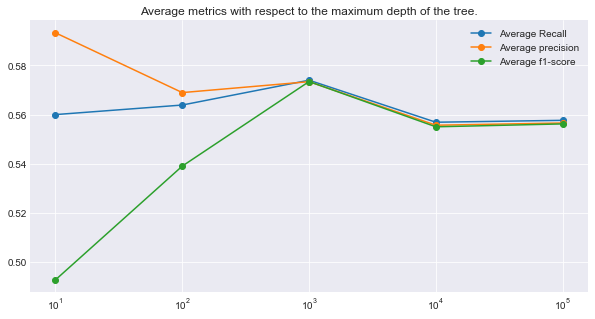

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,5))
axes.set_xscale("log", nonposx='clip')
axes.plot(depth, recall, label = 'Average Recall', marker='o')
axes.plot(depth, precision, label = 'Average precision', marker='o')
axes.plot(depth, f1, label = 'Average f1-score', marker='o')
axes.set_title('Average metrics with respect to the maximum depth of the tree.')
axes.legend()
plt.savefig('liar-dt.pdf')

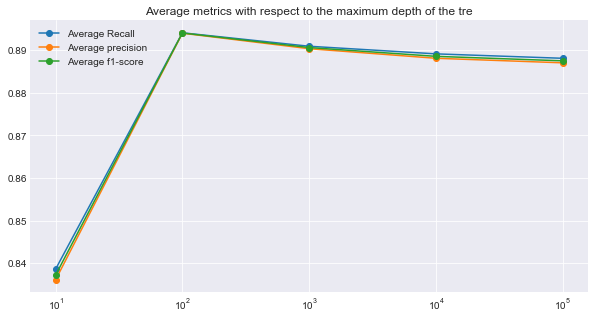

In [7]:
res = collection.find_one({'experiment_id' : 16})
report = [clr['classification_report'] for clr in res['report']]
recall = [x['weighted avg']['recall'] for x in report]
precision = [x['weighted avg']['precision'] for x in report]
f1 = [x['weighted avg']['f1-score'] for x in report]
depth = [x['max_depth'] for x in res['report']]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,5))
axes.set_xscale("log", nonposx='clip')
axes.plot(depth, recall, label = 'Average Recall', marker='o')
axes.plot(depth, precision, label = 'Average precision', marker='o')
axes.plot(depth, f1, label = 'Average f1-score', marker='o')
axes.set_title('Average metrics with respect to the maximum depth of the tre')
axes.legend()
plt.savefig('fake-dt.pdf')

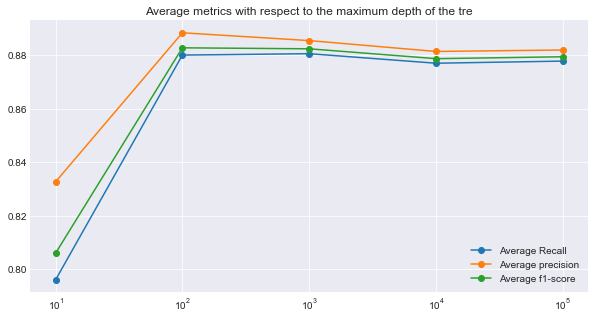

In [8]:
res = collection.find_one({'experiment_id' : 19})
report = [clr['classification_report'] for clr in res['report']]
recall = [x['weighted avg']['recall'] for x in report]
precision = [x['weighted avg']['precision'] for x in report]
f1 = [x['weighted avg']['f1-score'] for x in report]
depth = [x['max_depth'] for x in res['report']]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,5))
axes.set_xscale("log", nonposx='clip')
axes.plot(depth, recall, label = 'Average Recall', marker='o')
axes.plot(depth, precision, label = 'Average precision', marker='o')
axes.plot(depth, f1, label = 'Average f1-score', marker='o')
axes.set_title('Average metrics with respect to the maximum depth of the tre')
axes.legend()
plt.savefig('fake-dt-SMOTE.pdf')